In [1]:
# Import configuration
from src.sim import run

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns

# For analysis
import numpy as np
import pandas as pd

sns.set_style("whitegrid")

[{'N': 1, 'T': range(0, 300), 'M': {'MARKETING_STEADY': 500, 'MARKETING_SHOCK_MAG': 1234, 'MARKETING_SHOCK_FREQ': 2, 'EXO_EXPERIENCE': 140, 'SOURCE_POOL': 10000, 'THRESHOLD': 20}}]


In [2]:
experiments = run.run()


                            __________   ____ 
          ________ __ _____/ ____/   |  / __ \
         / ___/ __` / __  / /   / /| | / / / /
        / /__/ /_/ / /_/ / /___/ ___ |/ /_/ / 
        \___/\__,_/\__,_/\____/_/  |_/_____/  
        by BlockScience
        
Execution Mode: multi_proc: [<cadCAD.configuration.Configuration object at 0x000002C27B3DE978>]
Configurations: [<cadCAD.configuration.Configuration object at 0x000002C27B3DE978>]


In [3]:
print(experiments.dataset[0].head())

   timestamp  signal                                           adoption state  \
0 2020-01-01       0  <class 'src.sim.model.utils.Adoption'>: {'repu...    []   
2 2020-01-01     500  <class 'src.sim.model.utils.Adoption'>: {'repu...    []   
4 2020-01-01     500  <class 'src.sim.model.utils.Adoption'>: {'repu...    []   
6 2020-01-01     500  <class 'src.sim.model.utils.Adoption'>: {'repu...    []   
8 2020-01-01     500  <class 'src.sim.model.utils.Adoption'>: {'repu...    []   

   run  substep  timestep  
0    1        0         0  
2    1        2         1  
4    1        2         2  
6    1        2         3  
8    1        2         4  


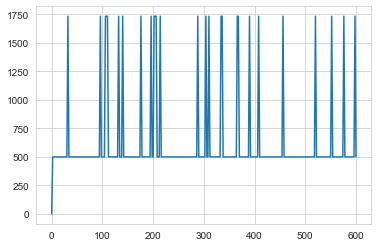

In [4]:
plt.plot(experiments.dataset[0].signal)

In [5]:
experiments.dataset[0].adoption[100].reputation

50

In [6]:
first_experiment = experiments.dataset[0]

In [7]:
len(first_experiment)

301

In [8]:
print(first_experiment.adoption[6])

<class 'src.sim.model.utils.Adoption'>: {'reputation': 3, 'state': 'loyal', 'threshold': 20}


In [9]:
# for evens in range(len(experiment)):
#     index = evens * 2
#     print(experiment.adoption[index].reputation)
#     print(experiment.adoption[index].state)

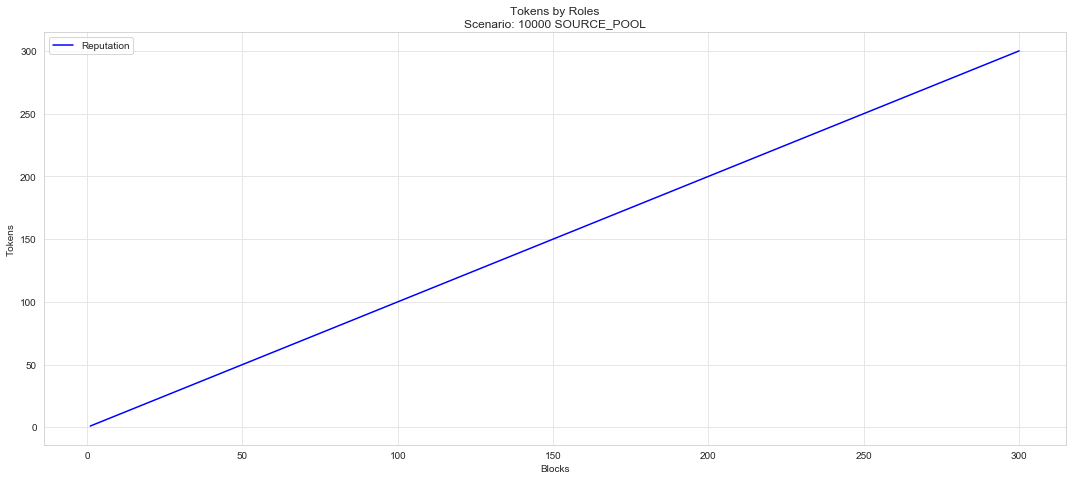

In [10]:
experiments = experiments.sort_values(by =['SOURCE_POOL']).reset_index(drop=True)

cols = 1
rows = 1
cc_idx = 0

while cc_idx<len(experiments):
    cc = experiments.iloc[cc_idx]['SOURCE_POOL']
    cc_label = experiments.iloc[cc_idx]['SOURCE_POOL']
#     secondary_label = experiments.iloc[cc_idx]['route_allocation']
    sub_experiments = experiments[experiments['SOURCE_POOL']==cc]
    cc_idx += len(sub_experiments)
    fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(15*cols,7*rows))
    sub_experiments.reset_index(drop=False)
    for i, experiment in sub_experiments.iterrows():
        df = experiment['dataset'].copy()
        df['rep_count'] = df.adoption.apply(lambda x: np.array(x.reputation))
        df['adopt_state'] = df.adoption.apply(lambda x: np.array(x.state))


#         df['j_wallet'] = np.array(df.j_wallet,dtype = float)
        
#         df_j = df.groupby('timestep').agg({'j_wallet': ['min', 'mean', 'max']}).reset_index()

        plot_label = experiment['SOURCE_POOL']
        ax = axs
        title = 'Tokens by Roles' + '\n' + 'Scenario: ' + str(cc_label)  + ' SOURCE_POOL'
        ax.set_title(title)
        ax.set_ylabel('Tokens')
        colors = ['b','orange', 'g', 'r']

#         ax.plot(df_j.timestep, df_j['j_wallet']['mean'],color = colors[0], label='j_wallet')
        ax.plot(df.timestep, df['rep_count'],color = colors[0], label='Reputation')

        ax.legend()
#         ax.fill_between(df_j.timestep, df_j[('j_wallet','min')], df_j[('j_wallet','max')], alpha=0.3 ,color = colors[0],label='j_wallet')        

#         ax.fill_between(df_j.timestep, df_j[('j_wallet','min')], df_j[('j_wallet','max')], alpha=0.3 ,color = colors[0],label='j_wallet')        

        ax.set_xlabel('Blocks')
        ax.grid(color='0.9', linestyle='-', linewidth=1)

        plt.tight_layout()
        
fig.tight_layout(rect=[0, 0, 1, .97])
fig.patch.set_alpha(1)
display(fig)
plt.close()

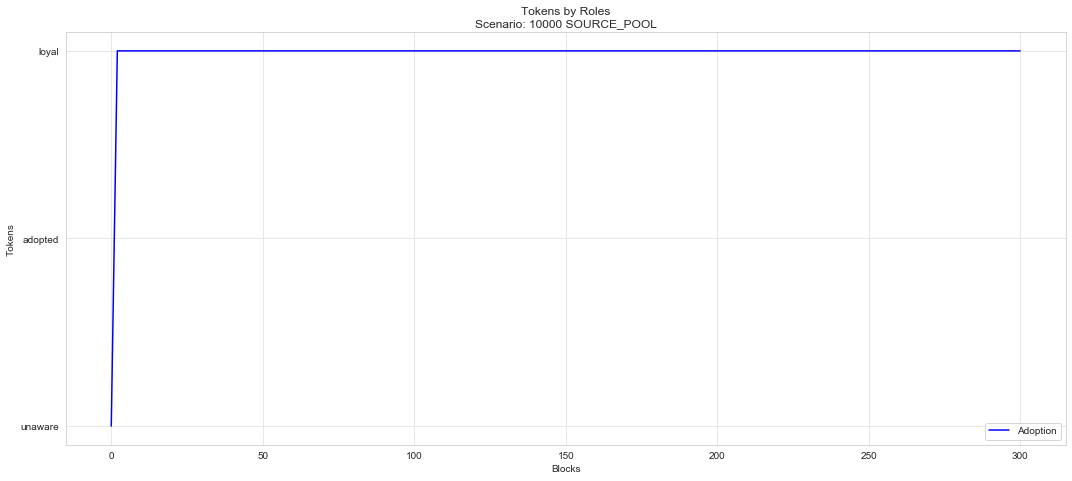

In [11]:
experiments = experiments.sort_values(by =['SOURCE_POOL']).reset_index(drop=True)

cols = 1
rows = 1
cc_idx = 0

while cc_idx<len(experiments):
    cc = experiments.iloc[cc_idx]['SOURCE_POOL']
    cc_label = experiments.iloc[cc_idx]['SOURCE_POOL']
#     secondary_label = experiments.iloc[cc_idx]['route_allocation']
    sub_experiments = experiments[experiments['SOURCE_POOL']==cc]
    cc_idx += len(sub_experiments)
    fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(15*cols,7*rows))
    sub_experiments.reset_index(drop=False)
    for i, experiment in sub_experiments.iterrows():
        df = experiment['dataset'].copy()
        df['rep_count'] = df.adoption.apply(lambda x: np.array(x.reputation))
        df['adopt_state'] = df.adoption.apply(lambda x: np.array(x.state))


#         df['j_wallet'] = np.array(df.j_wallet,dtype = float)
        
#         df_j = df.groupby('timestep').agg({'j_wallet': ['min', 'mean', 'max']}).reset_index()

        plot_label = experiment['SOURCE_POOL']
        ax = axs
        title = 'Tokens by Roles' + '\n' + 'Scenario: ' + str(cc_label)  + ' SOURCE_POOL'
        ax.set_title(title)
        ax.set_ylabel('Tokens')
        colors = ['b','orange', 'g', 'r']

#         ax.plot(df_j.timestep, df_j['j_wallet']['mean'],color = colors[0], label='j_wallet')
        ax.plot(df.timestep, df['adopt_state'],color = colors[0], label='Adoption')

        ax.legend()
#         ax.fill_between(df_j.timestep, df_j[('j_wallet','min')], df_j[('j_wallet','max')], alpha=0.3 ,color = colors[0],label='j_wallet')        

#         ax.fill_between(df_j.timestep, df_j[('j_wallet','min')], df_j[('j_wallet','max')], alpha=0.3 ,color = colors[0],label='j_wallet')        

        ax.set_xlabel('Blocks')
        ax.grid(color='0.9', linestyle='-', linewidth=1)

        plt.tight_layout()
        
fig.tight_layout(rect=[0, 0, 1, .97])
fig.patch.set_alpha(1)
display(fig)
plt.close()